In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
#from keras.optimizers import SGD, RMSprop

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!unzip /content/sample_data/Data/archive.zip

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/covid-chestxray-dataset-master/metadata.csv")
print(df.head(5))

  patientid  offset  ... other_notes  Unnamed: 29
0         2     0.0  ...         NaN          NaN
1         2     3.0  ...         NaN          NaN
2         2     5.0  ...         NaN          NaN
3         2     6.0  ...         NaN          NaN
4         4     0.0  ...         NaN          NaN

[5 rows x 30 columns]


In [ ]:
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n_images = [] 
c_images = []

dir = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/covid-chestxray-dataset-master/images"

#for img_path in glob.glob(dir + '/*'):
for index, report in df.iterrows():
  #print(report['filename'][-4:])
  
  if report['filename'][-4:] in ['.png', '.jpg', '.jpeg']:
    dir_covid = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/sorted_data/Covid"
    dir_normal = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/sorted_data/Normal"

    if 'COVID-19' in report['finding']:             #for positive sars-cov2
      img_path = dir + "/" + report['filename']
      shutil.copy(img_path, dir_covid)
      c_images.append(mpimg.imread(img_path))
    
    if 'No Finding' in report['finding']:           #for negative sars-cov2
      img_path = dir + "/" + report['filename']
      shutil.copy(img_path, dir_normal)
      n_images.append(mpimg.imread(img_path)) 
  else:
    continue
print(len(c_images))
print(len(n_images))

KeyboardInterrupt: ignored

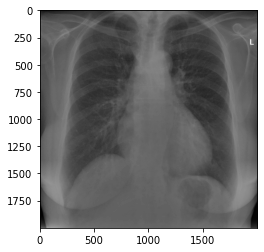

In [ ]:
plt.imshow(n_images[6], cmap='gray') 

In [ ]:
#DATASET_DIR = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/COVID-19 Patients Lungs X Ray Images 10000/dataset"
DATASET_DIR = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/sorted_data"

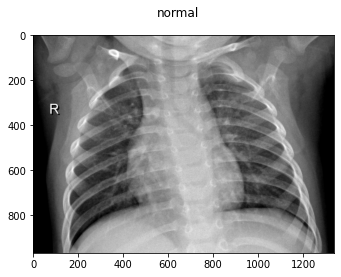

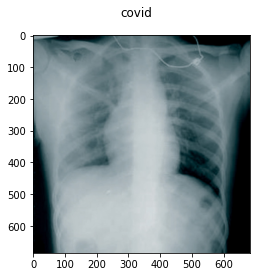

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[5], cmap='gray')

In [ ]:
print(len(normal_images))
print(len(covid_images))

456
420


In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))

model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.3  )

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 577 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Epoch 1/48
96/96 [==============================] - 77s 790ms/step - loss: 0.6983 - accuracy: 0.5079 - val_loss: 0.6992 - val_accuracy: 0.5122
Epoch 2/48
96/96 [==============================] - 75s 785ms/step - loss: 0.7758 - accuracy: 0.6165 - val_loss: 0.5885 - val_accuracy: 0.6911
Epoch 3/48
96/96 [==============================] - 76s 788ms/step - loss: 0.5545 - accuracy: 0.8249 - val_loss: 0.5608 - val_accuracy: 0.7236
Epoch 4/48
96/96 [==============================] - 75s 782ms/step - loss: 0.3790 - accuracy: 0.8774 - val_loss: 0.5617 - val_accuracy: 0.7724
Epoch 5/48
96/96 [==============================] - 75s 781ms/step - loss: 0.3408 - accuracy: 0.8949 - val_loss: 0.5190 - val_accuracy: 0.7561
Epoch 6/48
96/96 [==============================] - 75s 780ms/step - loss: 0.3498 - accuracy: 0.8984 - val_loss: 0.7604 - val_accuracy: 0.8171
Epoch 7/48
96/96 [==============================] - 75s 781ms/step - loss: 0.3441 - accuracy: 0.8984 - val_loss: 0.5426 - val_accuracy: 0.7846

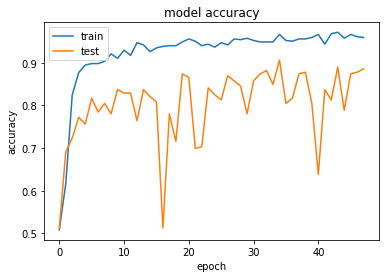

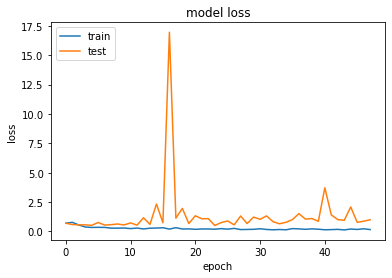

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9597197771072388
validation_accuracy 0.8861788511276245


In [ ]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'co

In [ ]:
label = validation_generator.classes

In [ ]:
label = validation_generator.classes
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
cf

array([[126, 121],
       [  0,   0]])

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,126,126
1,121,121
All,247,247


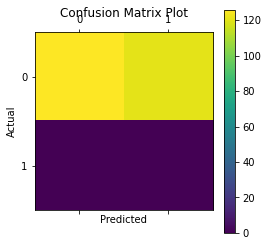

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [ ]:
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

In [ ]:
!pip3 install keras --upgrade

In [ ]:
path = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/COVID-19 Patients Lungs X Ray Images 10000/dataset/covid/covid (1).png"
img = image.load_img(path, target_size = (150, 150))
img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 150, 150, 3)

In [ ]:
model.predict(img)

array([[0.00903985]], dtype=float32)

In [ ]:
print(labels)

{'covid': 0, 'normal': 1}


In [ ]:
path = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/COVID-19 Patients Lungs X Ray Images 10000/dataset/normal/IM-0219-0001.jpeg"
img1 = image.load_img(path, target_size = (150, 150))
img1 = image.img_to_array(img1)/255
img1 = np.array([img1])
img1.shape

(1, 150, 150, 3)

In [ ]:
model.predict(img1)

array([[1.]], dtype=float32)

In [ ]:
path = "/content/drive/MyDrive/VIT Vellore/Sem 3/CSE3013_AI/Project Work/Sorting Data/sorted_data/normal/16745_3_1.png"
img1 = image.load_img(path, target_size = (150, 150))
img1 = image.img_to_array(img1)/255
img1 = np.array([img1])
img1.shape

(1, 150, 150, 3)

In [ ]:
model.predict(img1)

array([[0.8350874]], dtype=float32)